In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
tf.random.set_seed(5)

In [ ]:
df = pd.read_csv("loan_data.csv")

In [ ]:
df.shape

(9578, 14)

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


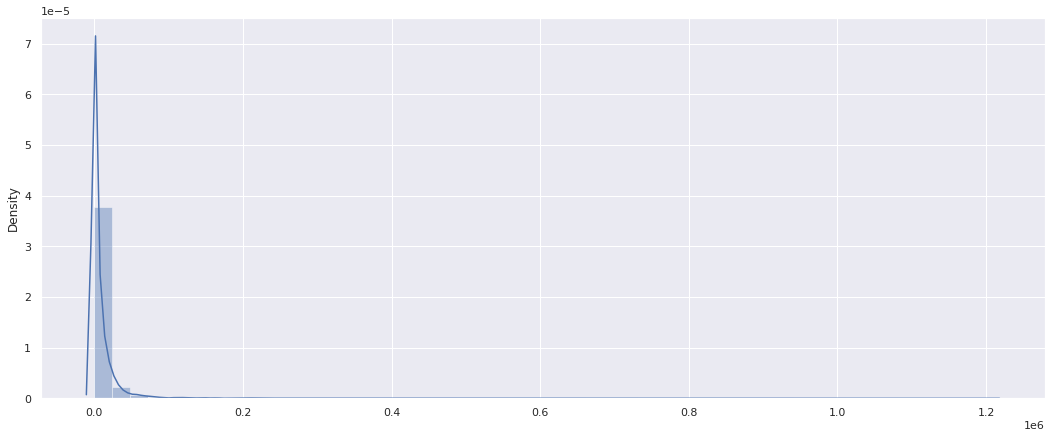

In [ ]:
sns.distplot(df[['not.fully.paid','revol.bal']])

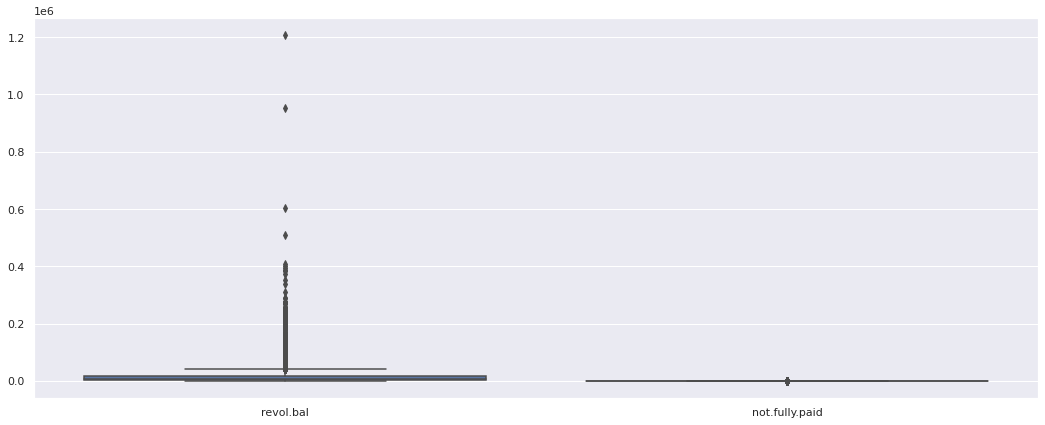

In [ ]:
sns.boxplot(data=df[['revol.bal','not.fully.paid']])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['purpose'] = le.fit_transform(df['purpose'])

In [ ]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


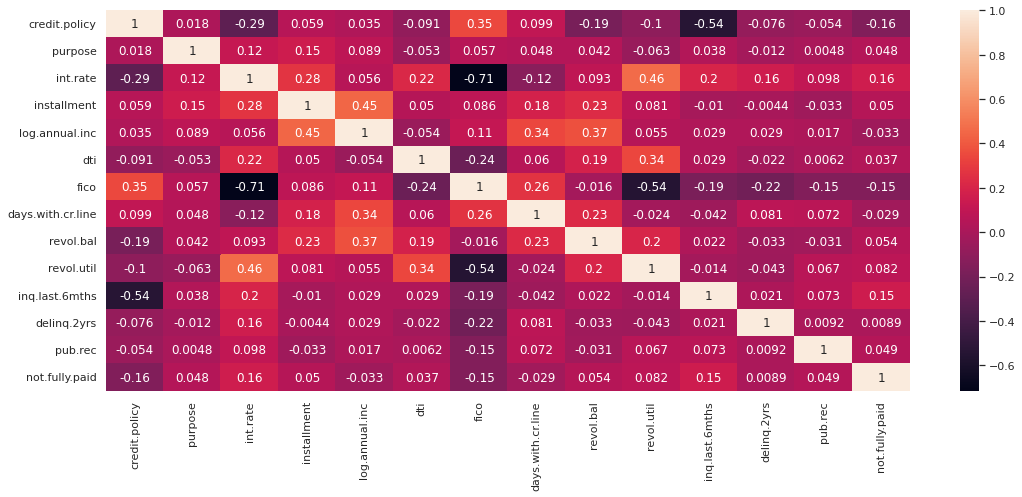

In [ ]:
sns.set(rc = {'figure.figsize' :(18,7)})
sns.heatmap(df.corr(),annot=True)

In [ ]:
df_new = df.drop(labels=['fico'],axis=1)

In [ ]:
df_new

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0,1


In [ ]:
X = df_new.iloc[:,0:11].values
y = df_new.iloc[:,[12]].values

In [ ]:
print(X)

[[ 1.      2.      0.1189 ... 52.1     0.      0.    ]
 [ 1.      1.      0.1071 ... 76.7     0.      0.    ]
 [ 1.      2.      0.1357 ... 25.6     1.      0.    ]
 ...
 [ 0.      2.      0.1071 ... 82.9     8.      0.    ]
 [ 0.      4.      0.16   ...  3.2     5.      0.    ]
 [ 0.      2.      0.1392 ... 57.      6.      0.    ]]


In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X

array([[ 1.    ,  2.    ,  0.1189, ..., 52.1   ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  0.1071, ..., 76.7   ,  0.    ,  0.    ],
       [ 1.    ,  2.    ,  0.1357, ..., 25.6   ,  1.    ,  0.    ],
       ...,
       [ 0.    ,  2.    ,  0.1071, ..., 82.9   ,  8.    ,  0.    ],
       [ 0.    ,  4.    ,  0.16  , ...,  3.2   ,  5.    ,  0.    ],
       [ 0.    ,  2.    ,  0.1392, ..., 57.    ,  6.    ,  0.    ]])

In [ ]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
X_scaled = mms.fit_transform(X)

In [ ]:
X_scaled

array([[1.        , 0.33333333, 0.37659847, ..., 0.43781513, 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.3011509 , ..., 0.64453782, 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.48401535, ..., 0.21512605, 0.03030303,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.3011509 , ..., 0.69663866, 0.24242424,
        0.        ],
       [0.        , 0.66666667, 0.63938619, ..., 0.02689076, 0.15151515,
        0.        ],
       [0.        , 0.33333333, 0.50639386, ..., 0.4789916 , 0.18181818,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7662, 11)
(1916, 11)
(7662, 1)
(1916, 1)


In [ ]:
X_train.shape[1]

11

In [ ]:
# Architecture of the model
model = tf.keras.models.Sequential()


# input + HL-1
model.add(tf.keras.layers.Dense(units=12, activation = 'relu', input_shape = (X_train.shape[1],)))

# HL-2
model.add(tf.keras.layers.Dense(units=12, activation = 'relu'))

# HL-3
model.add(tf.keras.layers.Dense(units=12, activation = 'relu'))

# output
model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer = 'sgd',
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [ ]:
# fit the model
mdl_history = model.fit(X_train,y_train,
                       epochs = 2000,
                       validation_data=(X_test,y_test))


Epoch 1/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8416 - val_loss: 0.4330 - val_accuracy: 0.8335
Epoch 2/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8416 - val_loss: 0.4329 - val_accuracy: 0.8335
Epoch 3/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8416 - val_loss: 0.4331 - val_accuracy: 0.8335
Epoch 4/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8416 - val_loss: 0.4330 - val_accuracy: 0.8335
Epoch 5/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8416 - val_loss: 0.4328 - val_accuracy: 0.8335
Epoch 6/2000
240/240 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8416 - val_loss: 0.4328 - val_accuracy: 0.8335
Epoch 7/2000
240/240 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8416 - val_loss: 0.4326 - val_accuracy:

In [ ]:
print(mdl_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


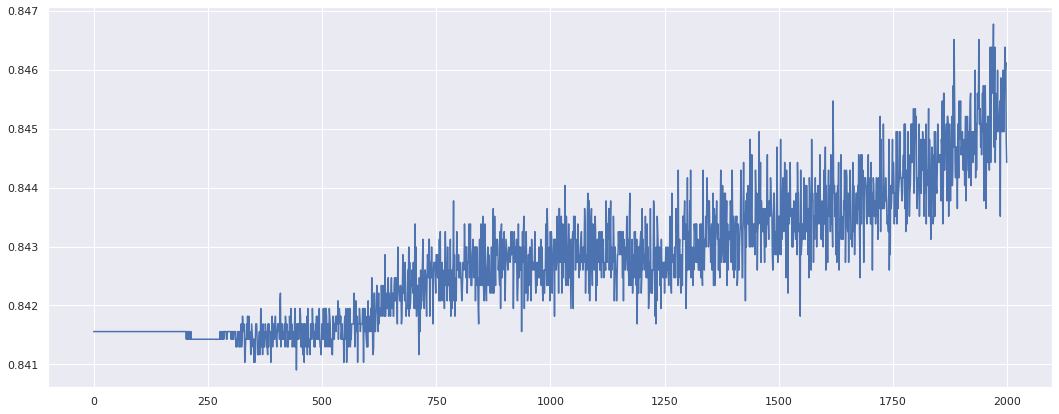

In [ ]:
plt.plot(mdl_history.history['accuracy'])

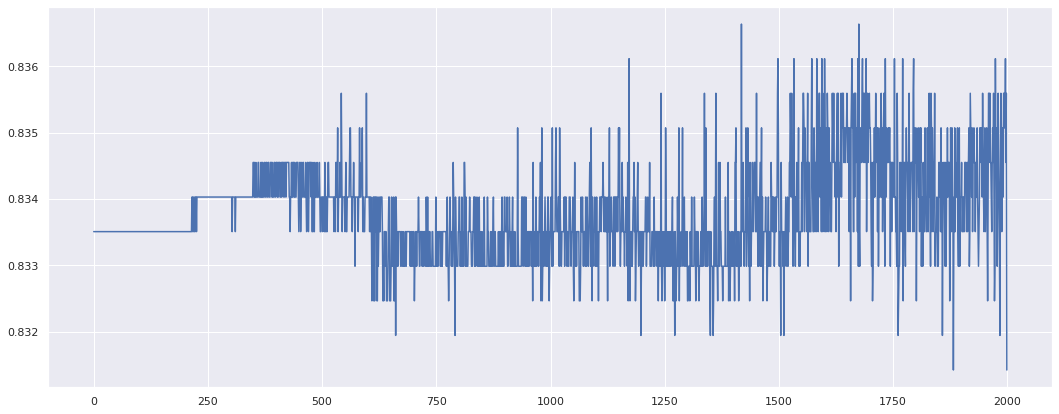

In [ ]:
plt.plot(mdl_history.history['val_accuracy'])

Text(0.5, 1.0, 'Model_Accuracy')

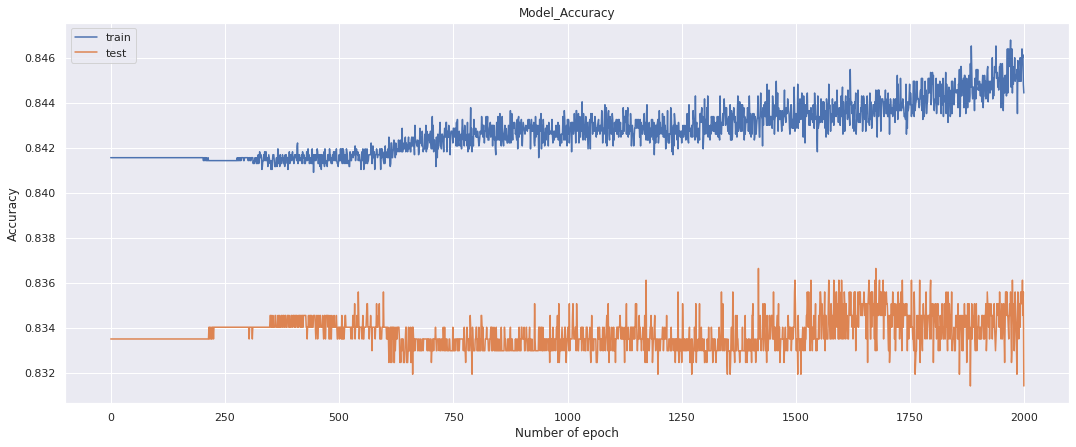

In [ ]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.legend(('train','test'),loc= 'best')

plt.xlabel( "Number of epoch")
plt.ylabel('Accuracy')
plt.title('Model_Accuracy')

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
#  threshould = 0.5

pred_test = (pred_test>0.5)

In [ ]:
pred_test.astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print('Confusion matrix ')
print(confusion_matrix(y_test,pred_test))

Confusion matrix 
[[1577   20]
 [ 303   16]]


In [ ]:
print('Classification Report: ')
print(classification_report(y_test,pred_test))

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1597
           1       0.44      0.05      0.09       319

    accuracy                           0.83      1916
   macro avg       0.64      0.52      0.50      1916
weighted avg       0.77      0.83      0.77      1916

